In [1]:
#importnant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for Data preprocessing
from sklearn.preprocessing import MinMaxScaler

# for building the model
import tensorflow as tf
from tensorflow.keras import layers,losses,metrics,optimizers

C:\Users\sushant\anaconda3\envs\project\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sushant\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\sushant\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"

Bad key text.latex.unicode in file C:\Users\sushant\anaconda3\envs\project\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file C:\Users\sushant\anaconda3\envs\project\lib\site-packages\matplotlib\mpl-data\styl

In [6]:
#read The data
df = pd.read_csv('data/TrainingData.csv')

In [7]:
df

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,100,100,100,100,100,100,100,100,100,100,...,100,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683
19933,100,100,100,100,100,100,100,100,100,100,...,100,-7390.6206,4.864836e+06,1,2,140,2,18,10,1371710402
19934,100,100,100,100,100,100,100,100,100,100,...,100,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921
19935,100,100,100,100,100,100,100,100,100,100,...,100,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049


In [8]:
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [9]:
df.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [11]:
columns = df.columns

# stands for access points
ap = columns[:520]
details = columns[520:]

In [12]:
access_points = df[ap]
access_points = access_points.apply(abs)
other_details = df[details]
other_details['LONGITUDE'] = other_details['LONGITUDE'].apply(abs)

C:\Users\sushant\AppData\Local\Temp\ipykernel_14440\2813699169.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_details['LONGITUDE'] = other_details['LONGITUDE'].apply(abs)


In [13]:
access_points.columns

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP511', 'WAP512', 'WAP513', 'WAP514', 'WAP515', 'WAP516', 'WAP517',
       'WAP518', 'WAP519', 'WAP520'],
      dtype='object', length=520)

In [14]:
other_details.columns

Index(['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object')

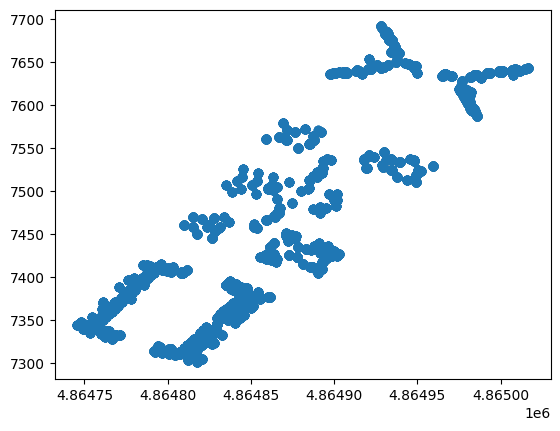

In [15]:
plt.scatter(other_details['LATITUDE'],other_details['LONGITUDE'])

In [16]:
counter = 0
for i in ap:
    print(f'Unique Values for {i}: {access_points[i].unique()}\n\n')
    if access_points[i].unique().shape == (1,):
        counter+=1
        
print('There is ',counter,' access point wasn\'t detected!')

Unique Values for WAP001: [100  97  95  96  94  93]


Unique Values for WAP002: [100  90  86]


Unique Values for WAP003: [100]


Unique Values for WAP004: [100]


Unique Values for WAP005: [100  92  96  97  95  93  90  89  91  94]


Unique Values for WAP006: [100  94  90  89  79  87  68  71  67  81  95  93  83  78  85  86  91  92
  62  65  80  82  96  70  88  72  84  58  76  66  60  77  74  61  98  97]


Unique Values for WAP007: [100  84  80  82  93  75  86  88  69  73  74  67  60  62  54  72  76  61
  65  49  83  92  71  78  81  77  79  90  85  95  94  89  96  97  87  68
  56  59  55  98  91  63  51  57  58  53  70  66  48  99  47  64]


Unique Values for WAP008: [100  97  83  90  95  84  98  91  80  92  86  81  94  88  85  96  87  89
  72  79  82  65  66  69  77  73  70  78  68  93  71  67  74  63  62  75
  76  61  64]


Unique Values for WAP009: [100  70  83  86  68  85  73  66  62  94  87  98  88  76  71  77  63  74
  79  93  96  90  69  56  67  82  80  92  91  61  84  59  95  64

Unique Values for WAP367: [100  93  96  83  90  94  82  97  92  86  98  88  87  91  85  95  84  78
  77  72  81  76  79  80  64  73  75  74  71  99]


Unique Values for WAP368: [100  96  95  94  93  91  97  98  89  87  90  92  86  88  85  83  75  82
  84  78  81  77  80  76  79  74  65  71  73  67  70  69  68  72  64]


Unique Values for WAP369: [100  86  92  83  81  90  94  97  95  99  88  91   0  89  62  51  55  52
  54  64  71  69  76  85  61  47  44  39  80  82  73  66  58  57  72  70
  41  77  84  75  60  65  56  67  59  78  50  40  53  79  49  48  74  63
  68  45  36  43  46  98  96  87  42  35]


Unique Values for WAP370: [100  93  97  89  94  92  91  95  90  88  99  98  96  58  75  81  68  52
  43  50  51  45  77  65  69  84  63  73  74  71  42  47  76  64  48  62
  86  83  72  80  79  40  70  55  46  66  54  85  59  41  49  87  78  44
  37  82  53  57  56  61  36  31  39]


Unique Values for WAP371: [100  90  92  88  89  91  95  84  99  94  96  85  86  65  49  38  52  51
  59 

In [17]:
for i in details:
    print(f'{i} Ranging From: {other_details[i].min()} to {other_details[i].max()}\n\n')

LONGITUDE Ranging From: 7300.818990092725 to 7691.338399998844


LATITUDE Ranging From: 4864745.745015971 to 4865016.687799998


FLOOR Ranging From: 0 to 4


BUILDINGID Ranging From: 0 to 2


SPACEID Ranging From: 1 to 254


RELATIVEPOSITION Ranging From: 1 to 2


USERID Ranging From: 1 to 18


PHONEID Ranging From: 1 to 24


TIMESTAMP Ranging From: 1369908924 to 1371737745




In [18]:
def normalize_axis(x, maximum=1):
    return (x - x.min())/(x.max() - x.min()) * maximum

In [19]:
# Train
LONGITUDE = normalize_axis(np.asarray(other_details['LONGITUDE']),1)
LATITUDE = normalize_axis(np.asarray(other_details['LATITUDE']),1)

LONGITUDE = np.round_(LONGITUDE, decimals=4)
LATITUDE = np.round_(LATITUDE, decimals=4)

other_details['LONGITUDE'] = LONGITUDE
other_details['LATITUDE'] = LATITUDE

C:\Users\sushant\AppData\Local\Temp\ipykernel_14440\2786590028.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_details['LONGITUDE'] = LONGITUDE
C:\Users\sushant\AppData\Local\Temp\ipykernel_14440\2786590028.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_details['LATITUDE'] = LATITUDE


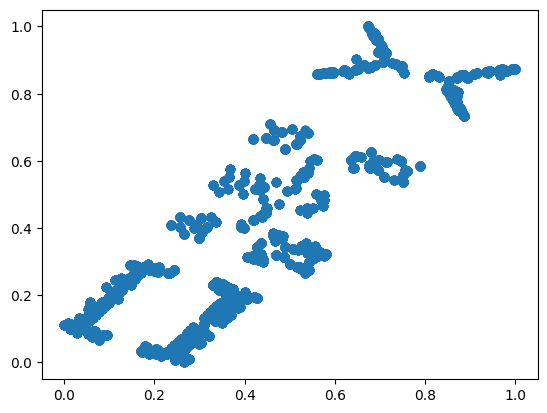

In [20]:
plt.scatter(other_details['LATITUDE'],other_details['LONGITUDE'])

In [21]:
# Define The Training Data, and Testing Data for the regressor
reg_labels = ['LONGITUDE','LATITUDE']

train_x = access_points[:15000]
reg_train_y = other_details[reg_labels][:15000]
building_train_y = other_details['BUILDINGID'][:15000]
floor_train_y = other_details['FLOOR'][:15000]


test_x = access_points[15000:]
reg_test_y = other_details[reg_labels][15000:]
building_test_y = other_details['BUILDINGID'][15000:] 
floor_test_y = other_details['FLOOR'][15000:]

In [22]:
train_x.replace(100,0,inplace=True)
test_x.replace(100,0,inplace=True)

C:\Users\sushant\anaconda3\envs\project\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [23]:
from sklearn.preprocessing import OneHotEncoder

enc_floor = OneHotEncoder()
enc_building = OneHotEncoder()

building_train_y = enc_building.fit_transform(np.asarray(building_train_y).reshape(-1,1)).toarray()
floor_train_y = enc_floor.fit_transform(np.asarray(floor_train_y).reshape(-1,1)).toarray()

In [24]:
building_test_y = enc_building.transform(np.asarray(building_test_y).reshape(-1,1)).toarray()
floor_test_y = enc_floor.transform(np.asarray(floor_test_y).reshape(-1,1)).toarray()

In [25]:
train_x.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,97,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
building_train_y

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [27]:
building_train_y.shape

(15000, 3)

In [28]:
floor_train_y

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [29]:
floor_train_y.shape

(15000, 5)

In [30]:
def buildRegressor():
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(input_shape=[520,]))
    model.add(layers.Dense(520))
    model.add(layers.Dense(256))
    model.add(layers.Dense(256))
    model.add(layers.Dense(128))
    model.add(layers.Dense(64,activation='linear'))
    model.add(layers.Dense(32,activation='linear'))
    model.add(layers.Dense(2,activation='linear'))
    
    model.compile(optimizer='adam',loss=losses.MeanAbsoluteError(),metrics=[metrics.RootMeanSquaredError()])
    return model

def buildClassifier():
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(input_shape=[520,]))
    model.add(layers.Dense(128))
    model.add(layers.Dense(64))
    model.add(layers.Dense(32,activation='relu'))
    model.add(layers.Dense(3,activation='softmax'))
    
    model.compile(optimizer='adam',loss=losses.CategoricalCrossentropy(),metrics=['accuracy'])
    return model

def buildClassifierFloor():
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(input_shape=[520,]))
    model.add(layers.Dense(128))
    model.add(layers.Dense(64))
    model.add(layers.Dense(32,activation='relu'))
    model.add(layers.Dense(5,activation='softmax'))
    
    model.compile(optimizer='adam',loss=losses.CategoricalCrossentropy(),metrics=['accuracy'])
    return model

In [31]:
regressor = buildRegressor()

In [32]:
building_classifier = buildClassifier()

In [33]:
floor_classifier = buildClassifierFloor()

In [34]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 520)               270920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               133376    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 6

In [35]:
history_reg = regressor.fit(train_x,reg_train_y,epochs=35,batch_size=250)

Epoch 1/35
60/60 [==============================] - 0s 7ms/step - loss: 6.6134 - root_mean_squared_error: 20.5010
Epoch 2/35
60/60 [==============================] - 0s 7ms/step - loss: 0.5774 - root_mean_squared_error: 0.7560
Epoch 3/35
60/60 [==============================] - 0s 7ms/step - loss: 0.4493 - root_mean_squared_error: 0.5838
Epoch 4/35
60/60 [==============================] - 0s 7ms/step - loss: 0.3593 - root_mean_squared_error: 0.4671
Epoch 5/35
60/60 [==============================] - 0s 7ms/step - loss: 0.2808 - root_mean_squared_error: 0.3643
Epoch 6/35
60/60 [==============================] - 0s 7ms/step - loss: 0.2569 - root_mean_squared_error: 0.3299
Epoch 7/35
60/60 [==============================] - 0s 7ms/step - loss: 0.2130 - root_mean_squared_error: 0.2752
Epoch 8/35
60/60 [==============================] - 0s 7ms/step - loss: 0.1881 - root_mean_squared_error: 0.2427
Epoch 9/35
60/60 [==============================] - 0s 7ms/step - loss: 0.1686 - root_mean_squa

In [36]:
regressor.evaluate(test_x,reg_test_y)

155/155 [==============================] - 0s 2ms/step - loss: 0.1193 - root_mean_squared_error: 0.1536


[0.11929413676261902, 0.15358911454677582]

In [38]:
regressor.predict(test_x[:10])

array([[0.23204692, 0.4347657 ],
       [0.14544238, 0.3514952 ],
       [0.22938694, 0.3369785 ],
       [0.2512511 , 0.40155035],
       [0.23278226, 0.41202456],
       [0.24825014, 0.3266706 ],
       [0.19576396, 0.3383693 ],
       [0.16508539, 0.34753078],
       [0.19137909, 0.3564185 ],
       [0.07171906, 0.21133345]], dtype=float32)

In [39]:
reg_test_y[:10]

,LONGITUDE,LATITUDE
15000,0.2071,0.3691
15001,0.2288,0.3439
15002,0.2022,0.3817
15003,0.1843,0.3822
15004,0.1897,0.4052
15005,0.1883,0.3686
15006,0.1850,0.3659
15007,0.1528,0.3402
15008,0.1675,0.3520
15009,0.1498,0.3378


In [40]:
history_building = building_classifier.fit(train_x,building_train_y,epochs=10,batch_size=100)

Epoch 1/10
150/150 [==============================] - 0s 1ms/step - loss: 0.3655 - accuracy: 0.9822
Epoch 2/10
150/150 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 0.9980
Epoch 3/10
150/150 [==============================] - 0s 1ms/step - loss: 0.0039 - accuracy: 0.9980
Epoch 4/10
150/150 [==============================] - 0s 1ms/step - loss: 0.0036 - accuracy: 0.9980
Epoch 5/10
150/150 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 0.9980
Epoch 6/10
150/150 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 0.9980
Epoch 7/10
150/150 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 0.9980
Epoch 8/10
150/150 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 0.9980
Epoch 9/10
150/150 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 0.9980
Epoch 10/10
150/150 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 0.9980

In [41]:
print(building_classifier.evaluate(test_x,building_test_y))

155/155 [==============================] - 0s 637us/step - loss: 0.0135 - accuracy: 0.9974
[0.013481262139976025, 0.9973668456077576]


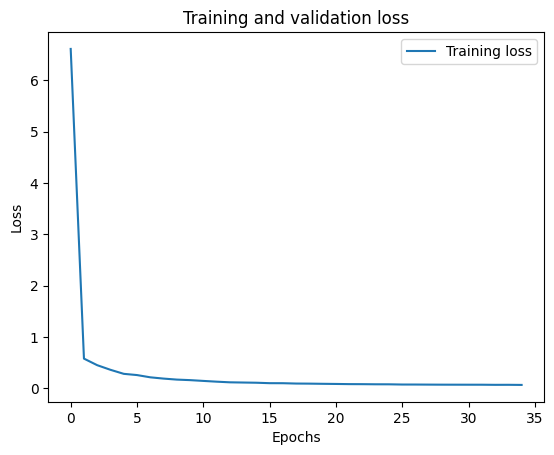

In [42]:
loss = history_reg.history['loss']

plt.plot(loss, label='Training loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [50]:
# reg_test_y.to_csv('testing_data.csv', index=False)

In [44]:
import pickle
with open("encoder_building", "wb") as f: 
    pickle.dump(enc_building, f)
with open("encoder_floor", "wb") as f: 
    pickle.dump(enc_floor, f)

In [45]:
regressor.save('Regressor.h5')
floor_classifier.save('Floor_classifier.h5')
building_classifier.save('Building_classifier.h5')

In [67]:
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle

# Load the encoder objects
with open("encoder_building", "rb") as f:
    enc_building = pickle.load(f)
with open("encoder_floor", "rb") as f:
    enc_floor = pickle.load(f)

# Load the trained models
regressor = tf.keras.models.load_model('Regressor.h5')
building_classifier = tf.keras.models.load_model('Building_classifier.h5')
floor_classifier = tf.keras.models.load_model('Floor_classifier.h5')

# # Load the testing data (make sure to preprocess this data in the same way as training data)
# test_data = pd.read_csv('data/testing_data.csv')




